In [1]:
#import parameters 
from parameters import *

## Read the polygons file 

In [2]:
import os 

#verify that the file existe 
print(os.path.isfile(polygon_file))

True


## Read the polygons file 

In [3]:
#insert the polygons in a geopandas dataframe
import geopandas as gdp 

polygons = gdp.read_file(polygon_file)
polygons.head()

,Name,forestTyp,changeTyp,id,geometry
0,Kabale,plantation,gain,1,"POLYGON Z ((30.15580 -1.26470 0.00000, 30.1567..."
1,Sheema,plantation,gain,2,"POLYGON Z ((30.39303 -0.50534 0.00000, 30.3947..."
2,Kikonda_CFR_Central UG,plantation,gain,3,"POLYGON Z ((31.48875 1.20014 0.00000, 31.50048..."
3,Ongom_CFR,plantation,gain,4,"POLYGON Z ((33.11916 2.25799 0.00000, 33.12578..."
4,Polygon inside Bukaleba CFR_Eastern UG,plantation,gain,5,"POLYGON Z ((33.37151 0.36414 0.00000, 33.37596..."


In [4]:
#only select the first one (debug only)
polygons = polygons[polygons['id'] < 3]
polygons

,Name,forestTyp,changeTyp,id,geometry
0,Kabale,plantation,gain,1,"POLYGON Z ((30.15580 -1.26470 0.00000, 30.1567..."
1,Sheema,plantation,gain,2,"POLYGON Z ((30.39303 -0.50534 0.00000, 30.3947..."


In [5]:
#transform the polygon into a square
from utils import *

squares = polygons.copy()
squares['geometry'] = squares['geometry'].map(to_square)

squares.head()

,Name,forestTyp,changeTyp,id,geometry
0,Kabale,plantation,gain,1,"POLYGON ((30.16613 -1.25620, 30.16613 -1.27420..."
1,Sheema,plantation,gain,2,"POLYGON ((30.40484 -0.49869, 30.40484 -0.51669..."


In [6]:
#create a list of ee object based on the shapely figures in geopandas
import ee

ee.Initialize() 

#decide not to use a lis comprehension for readability 
ee_squares = []
for index, row in squares.iterrows():
    ee_square = ee.Geometry.Polygon(list(row['geometry'].exterior.coords))
    ee_squares.append(ee_square)
    
#add these ee_polygons to he dataset 
squares['ee_geometry'] = ee_squares
squares.head()

,Name,forestTyp,changeTyp,id,geometry,ee_geometry
0,Kabale,plantation,gain,1,"POLYGON ((30.16613 -1.25620, 30.16613 -1.27420...","ee.Geometry({\n ""type"": ""Polygon"",\n ""coordi..."
1,Sheema,plantation,gain,2,"POLYGON ((30.40484 -0.49869, 30.40484 -0.51669...","ee.Geometry({\n ""type"": ""Polygon"",\n ""coordi..."


In [7]:
# check if the result is effectively a square
from sepal_ui import mapping as sm 
import geemap

m = sm.SepalMap()

#displays the first nb_squares squares
for index, row in squares.iterrows():
    m.addLayer(row['ee_geometry'], {'color':'red'}, row['Name'])
    if row['id'] == 1:
        m.centerObject(row['ee_geometry'], zoom=14)
    if index > min(len(squares), nb_squares):
        break
m

SepalMap(center=[-1.2651993964163877, 30.157129933963912], controls=(ZoomControl(options=['position', 'zoom_in…

## Create the tif file in earthengine 

In [8]:
from sepal_ui import sepalwidgets as sw

output = sw.Alert()
output.show()

Alert(children=[''], class_='mt-5 ', text=True, type='info')

In [9]:
from scripts import *

path = createPDF(polygon_file, squares, bands_combo, sources, output)
sw.DownloadBtn('clickable link', path)

DownloadBtn(children=[Icon(children=['mdi-download'], left=True), 'clickable link'], class_='ma-2', color='suc…

<AxesSubplot:>

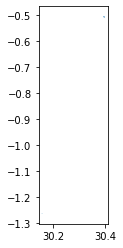

In [10]:
polygons.plot()